# Esercitazione #9

* Introduzione a [matplotlib](https://matplotlib.org/)
    * declarative API e object-oriented API
    * Figures e Axes
* Alternative a matplotlib: seaborn
* Librerie alternative 
* Ancora pandas: interoperabilità con matplotlib
* Esercizi con i [pinguini](https://allisonhorst.github.io/palmerpenguins/)

## References

* Documentazione di matplotlib:
    * [Tutorial](https://matplotlib.org/stable/tutorials/index)
    * Le [API di matplotlib](https://matplotlib.org/stable/api/index.html) (API == "elenco delle funzioni/comandi")
    * Lista dei [grafici](https://matplotlib.org/stable/plot_types/index.html) che si possono fare con mpl
    * [Esempi](https://matplotlib.org/stable/gallery/index.html)
* Libro di Jake Van Der Plas su [Numpy, Pandas, Matplotlib e Scikit-learn](https://jakevdp.github.io/PythonDataScienceHandbook/)

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Semplici grafici

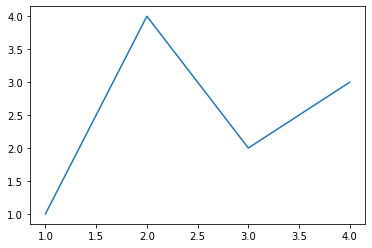

In [11]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # Plot some data on the axes.

## Numpy array

### OO-Api di matplotlib

In [12]:
x = np.arange(0, 4, 0.05)
y = np.sin(x*np.pi)

Text(0.5, 1.0, 'Sine wave')

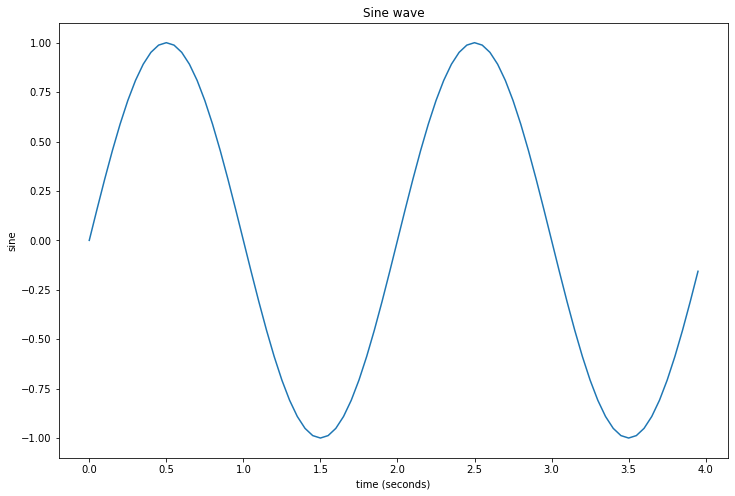

In [13]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(x, y)

# aggiungere dettagli
ax.set_xlabel('time (seconds)')
ax.set_ylabel('sine')
ax.set_title('Sine wave')

### pyplot - API dichiarativa simile a matlab

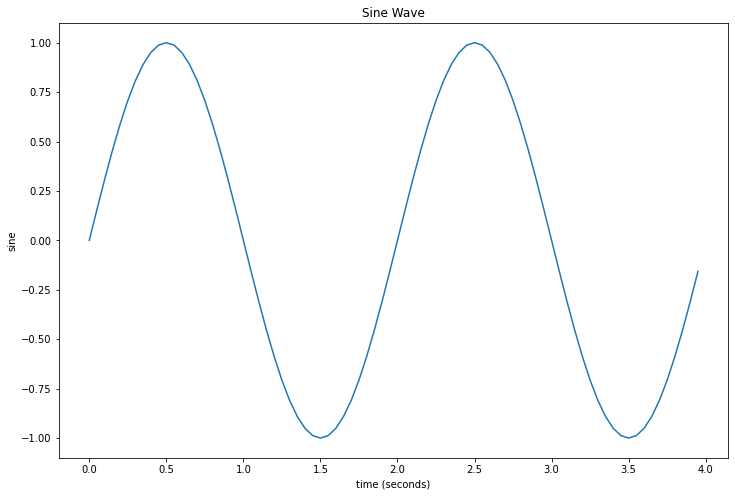

In [19]:
plt.figure(figsize=(12,8))
plt.plot(x, y)
plt.title("Sine Wave")
plt.xlabel("time (seconds)")
plt.ylabel("sine")

plt.show()

## Scatterplot

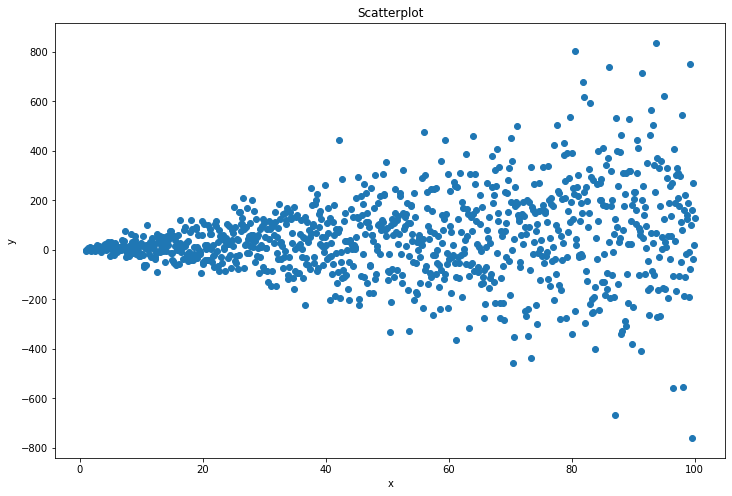

In [39]:
sigma = 3
mu = 2

a = np.linspace(1,100,1000)
b = a + sigma ba * np.random.randn(1000) + mu

fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(a, b)
ax.set(title="Scatterplot", xlabel="x", ylabel="y")

plt.show()

In [42]:
data = {"col1": a, "col2": b}

toy_dataset = pd.DataFrame(data=data)
toy_dataset.head()

,col1,col2
0,1.000000,1.088478
1,1.099099,-3.787632
2,1.198198,1.028398
3,1.297297,0.018694
4,1.396396,6.607958


## Usando direttamente pandas

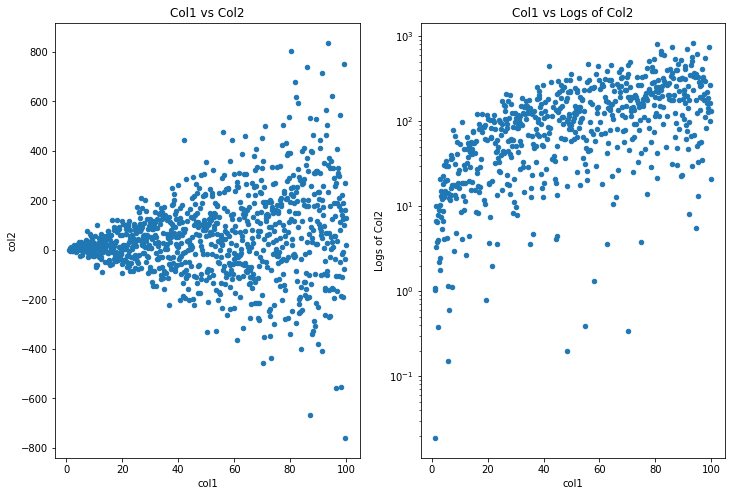

In [56]:
fig, axis = plt.subplots(1, 2, figsize=(12, 8))

toy_dataset.plot.scatter("col1", "col2", ax=axis[0], title="Col1 vs Col2")
toy_dataset.plot("col1", "col2", kind="scatter", ax=axis[1], logy=True, title="Col1 vs Logs of Col2", ylabel="Logs of Col2")

plt.show()

## Usando solo matplotlib

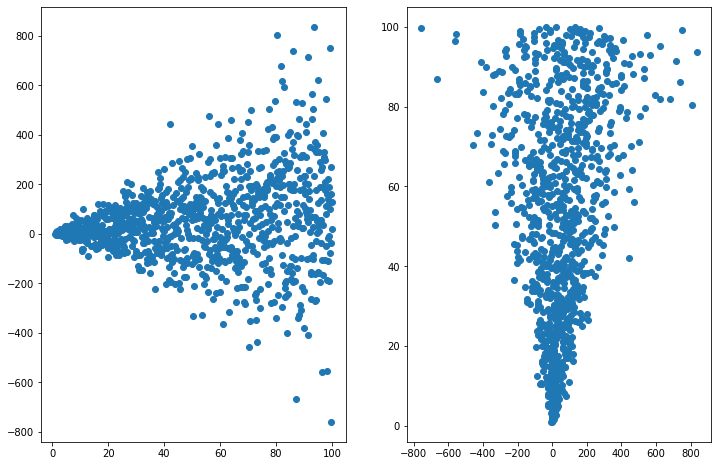

In [53]:
fig, ax = plt.subplots(1,2, figsize=(12, 8))

ax[0].scatter(toy_dataset.col1, toy_dataset["col2"])
ax[1].scatter(toy_dataset.col2, toy_dataset["col1"])

plt.show()

## Usare seaborn

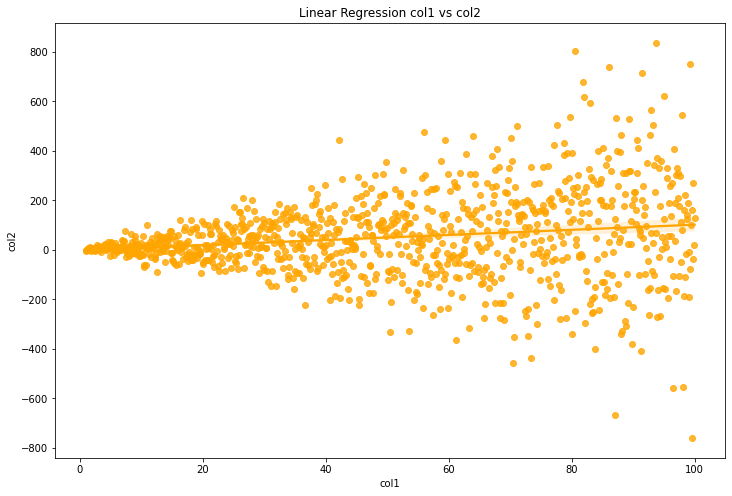

In [62]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.regplot(x="col1", y="col2", data=toy_dataset, ax=ax, color="orange")

ax.set(title="Linear Regression col1 vs col2")

plt.show()

## Pinguini & esempio di EDA - Exploratory Data Analysis

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" alt="drawing" width="750"/>

In [3]:
penguins_url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"
penguins = pd.read_csv(penguins_url)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [63]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [64]:
 penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [65]:
penguins.dropna(inplace=True)

In [66]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [67]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


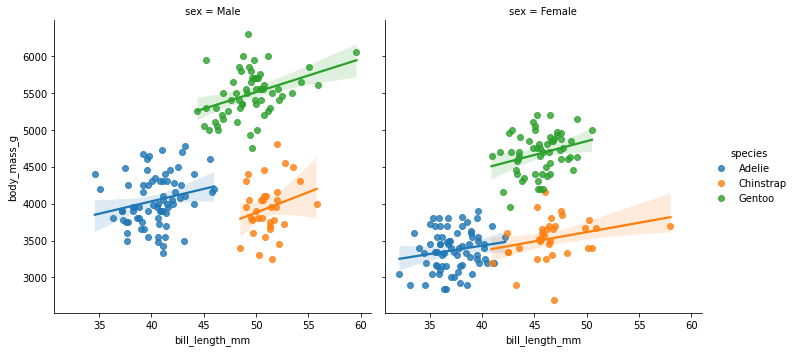

In [78]:
lm_plot = sns.lmplot(data=penguins, x="bill_length_mm", y="body_mass_g", hue="species", col="sex", truncate=True)

/Users/luca/.pyenv/versions/statistica-big-data/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


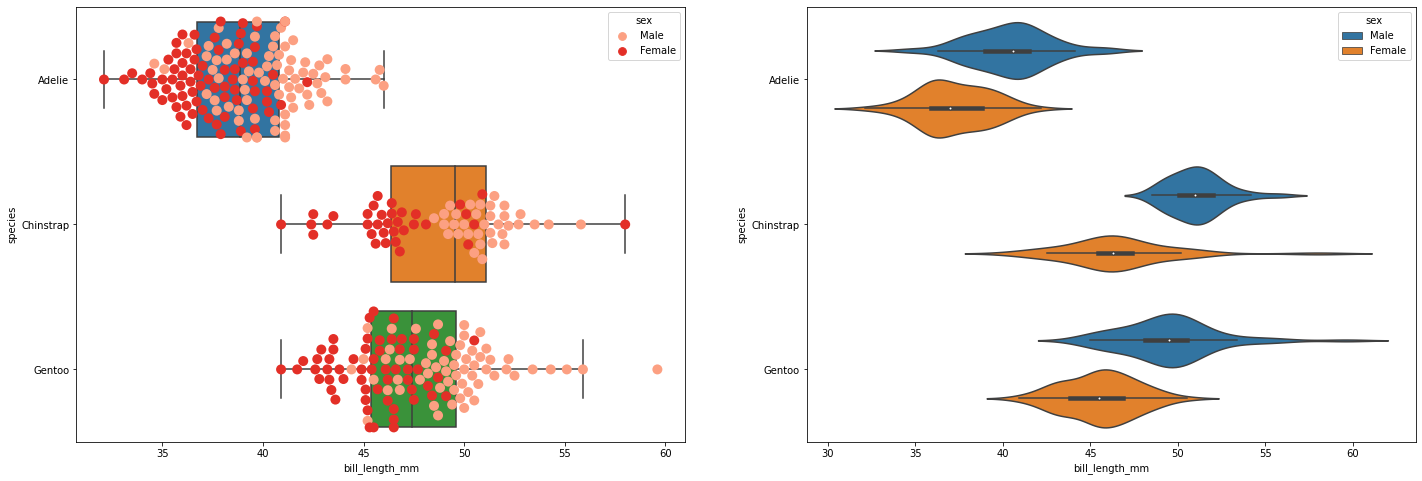

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(24, 8))

sns.boxplot(x="bill_length_mm", y="species", data=penguins, ax=ax[0])
sns.swarmplot(x="bill_length_mm", y="species", data=penguins, hue="sex", palette="Reds", ax=ax[0], size=10)

sns.violinplot(x="bill_length_mm", y="species", data=penguins, hue="sex", ax=ax[1])

plt.show()